# Step 2: Analyze the data and create some results

We're going to create some plots, and show how they can be stored as artifacts in the datastore, just like everything else

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

from pond.storage.file_datastore import FileDatastore
from pond import Activity


# As usual, we create an Activity object at the start of our notebook or script
activity = Activity(
    source='020_create_plot.ipynb', 
    datastore='./catalog',
    location='experiment1',
    author='pietro', 
)

# Read the data from the datastore

If we don't specify a version name explicitly, `pond` loads by default the latest version


In [2]:
c1 = activity.read('condition1_results')
c2 = activity.read('condition2_results')

In [3]:
activity.read_history

{'pond://catalog/experiment1/condition1_results/v3',
 'pond://catalog/experiment1/condition2_results/v1'}

In [4]:
c1

,Results
time,
1,7
3,2
5,1
7,5
9,3


In [5]:
c2

,Results
timf,
0,-3
2,-2
4,-1
6,-5
8,-3


# Analysis!

Our analysis in this case is just a plot

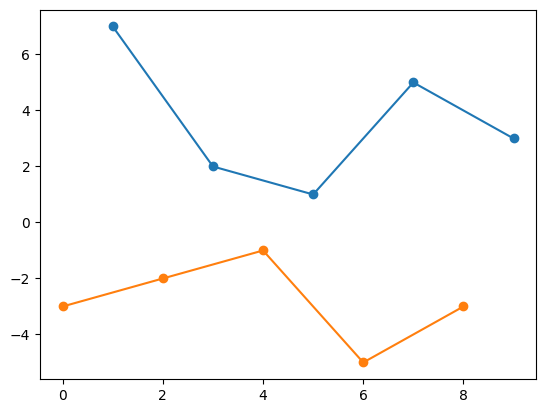

In [6]:
fig = plt.figure()
plt.plot(c1, marker='o')
plt.plot(c2, marker='o')

# Save the analysis results in the datastore

A plot can be saved in the datastore, just like any other piece of data

In [7]:
version = activity.write(fig, 'analysis', metadata={'extra_info': 'Some extra information for illustration'})

In the metadata of the written plot artifact you can find all the metadata:
- User-defined metadata: any information that you want to make sure stays associated to the artifact
- Provenance metadata: includes the source of the plot (the name of this notebook, in this case), the date and time it was written, the author, and the URI of the tables used to create the plot

In [8]:
version.manifest.collect()

{'user': {'extra_info': 'Some extra information for illustration'},
 'activity': {'source': '020_create_plot.ipynb',
  'author': 'pietro',
  'inputs': ['pond://catalog/experiment1/condition1_results/v3',
   'pond://catalog/experiment1/condition2_results/v1']},
 'version': {'uri': 'pond://catalog/experiment1/analysis/analysis/v1',
  'filename': 'analysis_v1.png',
  'date_time': '2024-09-12 11:22:12.069070',
  'artifact_name': 'analysis'},
 'artifact': {'data_hash': '02f36ddfff9d1b39a747204ff790375a'}}

# Like any other artifacts, images can be reloaded

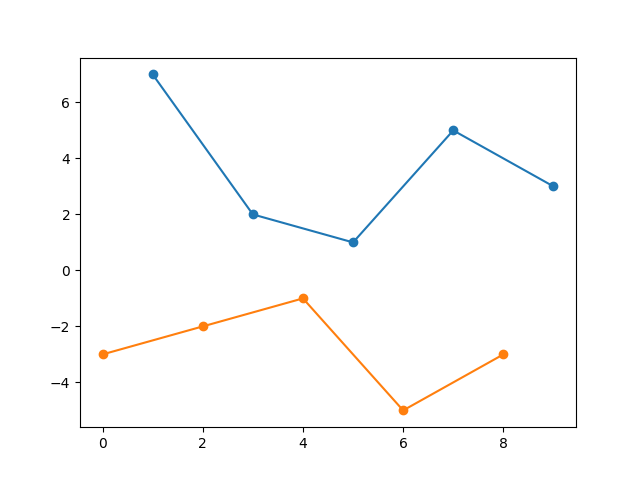

In [9]:
# By default, we load the latest version
activity.read('analysis')